# ***Importing exel file***

In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#X = pd.read_excel('BodyFat.xls', usecols = "B:Q")
#X.columns = [''] * len(X.columns)

In [65]:
df = pd.read_excel('BodyFat.xls', usecols = "B:Q")
df.keys()

Index(['BODYFAT', 'DENSITY', 'AGE', 'WEIGHT', 'HEIGHT', 'ADIPOSITY', 'NECK',
       'CHEST', 'ABDOMEN', 'HIP', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS',
       'FOREARM', 'WRIST'],
      dtype='object')

calculate the mean vector

In [66]:
X = df
X1 = X.mean()

In [67]:
X1


BODYFAT       18.938492
DENSITY        1.055574
AGE           44.884921
WEIGHT       178.924405
HEIGHT        70.148810
ADIPOSITY     25.436905
NECK          37.992063
CHEST        100.824206
ABDOMEN       92.555952
HIP           99.904762
THIGH         59.405952
KNEE          38.590476
ANKLE         23.102381
BICEPS        32.273413
FOREARM       28.663889
WRIST         18.229762
dtype: float64

In [68]:
XC = X - X1

In [69]:
XC

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,-6.338492,0.015226,-21.884921,-24.674405,-2.39881,-1.736905,-1.792063,-7.724206,-7.355952,-5.404762,-0.405952,-1.290476,-1.202381,-0.273413,-1.263889,-1.129762
1,-12.038492,0.029726,-22.884921,-5.674405,2.10119,-2.036905,0.507937,-7.224206,-9.555952,-1.204762,-0.705952,-1.290476,0.297619,-1.773413,0.236111,-0.029762
2,5.661508,-0.014174,-22.884921,-24.924405,-3.89881,-0.736905,-3.992063,-5.024206,-4.655952,-0.704762,0.194048,0.309524,0.897619,-3.473413,-3.463889,-1.629762
3,-8.038492,0.019526,-18.884921,5.825595,2.10119,-0.536905,-0.592063,0.975794,-6.155952,1.295238,0.694048,-1.290476,-0.302381,0.126587,0.736111,-0.029762
4,8.861508,-0.021574,-20.884921,5.325595,1.10119,0.163095,-3.592063,-3.524206,7.444048,1.995238,3.794048,3.609524,0.897619,-0.073413,-0.963889,-0.529762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,-7.438492,0.018026,25.115079,-44.674405,-3.14881,-4.336905,-3.092063,-11.624206,-8.955952,-11.104762,-9.805952,-3.790476,-1.602381,-6.673413,-2.963889,0.270238
248,13.361508,-0.031974,27.115079,22.075595,-0.39881,3.663095,2.907937,7.675794,12.444048,4.595238,0.194048,2.209524,0.097619,2.926587,-0.063889,1.870238
249,9.361508,-0.022774,27.115079,7.825595,-4.14881,4.763095,0.907937,10.275794,18.944048,1.795238,0.894048,-1.290476,-1.602381,-0.973413,-1.463889,-0.229762
250,6.361508,-0.015674,27.115079,11.825595,0.35119,1.563095,0.907937,7.475794,8.744048,-2.104762,-3.405952,3.009524,-0.402381,-1.773413,0.736111,1.570238


In [70]:
numOfRows = X.shape[0]
print(numOfRows)

252


In [71]:
XC_T = XC.transpose()

In [72]:
XC_T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251
BODYFAT,-6.338492,-12.038492,5.661508,-8.038492,8.861508,1.661508,0.061508,-6.138492,-13.838492,-6.938492,-11.438492,-10.438492,1.561508,1.861508,2.761508,1.561508,9.161508,3.461508,-2.838492,-2.438492,0.061508,-3.638492,-3.238492,-1.338492,-4.738492,-14.338492,-10.438492,3.461508,-14.238492,-9.538492,-6.638492,-12.438492,-5.538492,1.961508,12.161508,19.261508,4.661508,8.561508,14.861508,12.361508,...,0.361508,-0.438492,0.361508,26.161508,-5.138492,-10.738492,4.961508,-3.838492,-6.238492,6.361508,-7.038492,-12.838492,-7.638492,-6.138492,-4.038492,5.561508,-3.938492,-2.038492,-7.838492,-2.838492,-3.438492,6.961508,6.561508,-0.538492,5.061508,7.461508,-6.238492,9.861508,-1.938492,14.661508,10.361508,12.461508,9.161508,-3.638492,10.161508,-7.438492,13.361508,9.361508,6.361508,11.761508
DENSITY,0.015226,0.029726,-0.014174,0.019526,-0.021574,-0.005374,-0.000674,0.014826,0.034426,0.016626,0.027426,0.025626,-0.004274,-0.005074,-0.007174,-0.004374,-0.022274,-0.008774,0.006626,0.005426,-0.000474,0.008426,0.007526,0.002826,0.011226,0.035526,0.025526,-0.008774,0.035426,0.023426,0.016026,0.030626,0.016326,-0.005374,-0.029274,-0.045474,-0.011774,-0.020974,-0.035374,-0.029774,...,-0.001274,0.000526,-0.001274,-0.060574,0.012226,0.026326,-0.012274,0.009026,0.015026,-0.015674,0.017026,0.031826,0.018426,0.014726,0.009426,-0.013774,0.009126,0.004526,0.018926,0.006426,0.008026,-0.017174,-0.015274,0.000726,-0.013174,-0.018374,0.014926,-0.023974,0.004326,-0.034874,-0.025174,-0.029974,-0.022174,0.008526,-0.024774,0.018026,-0.031974,-0.022774,-0.015674,-0.028474
AGE,-21.884921,-22.884921,-22.884921,-18.884921,-20.884921,-20.884921,-18.884921,-19.884921,-19.884921,-21.884921,-18.884921,-17.884921,-12.884921,-14.884921,-9.884921,-9.884921,-10.884921,-12.884921,-16.884921,-11.884921,-16.884921,-16.884921,-13.884921,-12.884921,-16.884921,-17.884921,-10.884921,-13.884921,-17.884921,-15.884921,-12.884921,-15.884921,-17.884921,-3.884921,-3.884921,4.115079,-4.884921,5.115079,1.115079,5.115079,...,4.115079,5.115079,5.115079,6.115079,6.115079,6.115079,7.115079,8.115079,9.115079,9.115079,9.115079,10.115079,10.115079,10.115079,10.115079,10.115079,11.115079,11.115079,12.115079,12.115079,13.115079,13.115079,15.115079,17.115079,17.115079,18.115079,19.115079,20.115079,20.115079,20.115079,21.115079,22.115079,22.115079,23.115079,24.115079,25.115079,27.115079,27.115079,27.115079,29.115079
WEIGHT,-24.674405,-5.674405,-24.924405,5.825595,5.325595,31.325595,2.075595,-2.924405,12.075595,19.325595,7.325595,37.075595,1.575595,26.325595,8.825595,-16.174405,16.825595,30.325595,4.825595,32.825595,0.075595,21.575595,-38.674405,-30.174405,-27.674405,-19.674405,-47.424405,-30.924405,-45.674405,-18.174405,3.075595,-18.674405,-10.924405,39.575595,68.325595,12.825595,23.325595,17.825595,184.225595,24.075595,...,-10.674405,15.825595,-6.174405,40.075595,-29.674405,-24.424405,20.325595,-24.424405,-25.674405,51.075595,-17.174405,-36.674405,0.825595,-52.424405,-9.424405,19.575595,-4.424405,-11.174405,-31.174405,3.325595,-3.424405,-17.174405,-21.174405,-10.174405,12.575595,40.225595,-23.674405,10.825595,-51.424405,45.575595,55.325595,48.825595,20.575595,-23.424405,36.575595,-44.674405,22.075595,7.825595,11.825595,28.575595
HEIGHT,-2.398810,2.101190,-3.898810,2.101190,1.101190,4.601190,-0.398810,2.351190,3.851190,3.351190,4.351190,5.851190,-0.648810,1.101190,-0.648810,-4.148810,0.851190,0.851190,-2.398810,3.351190,-2.148810,-0.398810,-1.898810,-0.148810,-2.398810,1.351190,-2.648810,-2.648810,-5.398810,-1.148810,3.601190,1.101190,1.101190,0.851190,3.351190,-5.148810,-0.148810,-1.898810,2.101190,-3.148810,...,1.601190,0.601190,2.851190,-6.148810,-0.398810,-0.148810,1.601190,-0.898810,0.351190,2.101190,-2.648810,-2.898810,-

In [73]:
TSS = XC_T.dot(XC)

In [74]:
TSS

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
BODYFAT,15079.016627,-36.583896,7089.616270,35057.553274,-634.968452,5166.772024,2324.376984,11528.155198,17070.007262,8720.643810,5732.732262,2382.572381,879.676905,2897.927897,1428.110278,631.281310
DENSITY,-36.583896,0.090911,-16.713360,-83.399624,1.712632,-12.455366,-5.492182,-27.489240,-41.153811,-20.852489,-13.870661,-5.703323,-2.144634,-7.030095,-3.394328,-1.452574
AGE,7089.616270,-16.713360,39861.662698,-1184.892262,-1988.684524,1371.470238,872.769841,4705.301984,7858.822619,-1140.561905,-3322.827381,133.623810,-563.230952,-393.371032,-543.647222,630.563095
WEIGHT,35057.553274,-83.399624,-1184.892262,216794.402411,8329.597321,23879.483036,14896.458810,55608.736131,70634.045893,49722.860714,33642.078393,15178.793571,7672.715357,17838.843512,9395.267083,5025.781964
HEIGHT,-634.968452,1.712632,-1988.684524,8329.597321,3367.544643,-83.483929,567.022619,1045.517262,870.551786,1122.296429,716.451786,634.282143,412.535714,577.247024,424.779167,276.433929
ADIPOSITY,5166.772024,-12.455366,1371.470238,23879.483036,-83.483929,3340.486786,1731.453810,7038.704881,9122.209643,5794.205714,3906.884643,1576.068571,776.477857,2064.877262,1033.565833,535.063214
NECK,2324.376984,-5.492182,872.769841,14896.458810,567.022619,1731.453810,1483.244127,4037.138413,4961.371905,3212.659524,2228.531905,989.500952,494.214762,1347.836825,768.937778,424.279524
CHEST,11528.155198,-27.489240,4705.301984,55608.736131,1045.517262,7038.704881,4037.138413,17839.302341,20896.918690,12573.590952,8108.113690,3671.948095,1732.225476,4653.632183,2480.750278,1304.158452
ABDOMEN,17070.007262,-41.153811,7858.822619,70634.045893,870.551786,9122.209643,4961.371905,20896.918690,29184.961071,16948.052857,10893.166071,4812.064286,2079.076429,5601.264881,2752.689167,1566.190357
HIP,8720.643810,-20.852489,-1140.561905,49722.860714,1122.296429,5794.205714,3212.659524,12573.590952,16948.052857,12882.254286,8462.422857,3571.281429,1701.807143,4016.311905,1980.343333,1057.764286


Covariance matrix

In [75]:
covariance_matrix = (1/numOfRows) * TSS
covariance_matrix

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
BODYFAT,59.837368,-0.145174,28.133398,139.117275,-2.519716,20.503064,9.223718,45.746648,67.738124,34.605729,22.748938,9.454652,3.490781,11.499714,5.667104,2.505085
DENSITY,-0.145174,0.000361,-0.066323,-0.330951,0.006796,-0.049426,-0.021794,-0.109084,-0.163309,-0.082748,-0.055042,-0.022632,-0.008510,-0.027897,-0.013470,-0.005764
AGE,28.133398,-0.066323,158.181201,-4.701953,-7.891605,5.442342,3.463372,18.671833,31.185804,-4.526039,-13.185823,0.530253,-2.235043,-1.560996,-2.157330,2.502235
WEIGHT,139.117275,-0.330951,-4.701953,860.295248,33.053958,94.759853,59.112932,220.669588,280.293833,197.312939,133.500311,60.233308,30.447283,70.789062,37.282806,19.943579
HEIGHT,-2.519716,0.006796,-7.891605,33.053958,13.363272,-0.331285,2.250090,4.148878,3.454571,4.453557,2.843063,2.516993,1.637046,2.290663,1.685632,1.096960
ADIPOSITY,20.503064,-0.049426,5.442342,94.759853,-0.331285,13.255900,6.870848,27.931369,36.199245,22.992880,15.503510,6.254240,3.081261,8.193957,4.101452,2.123267
NECK,9.223718,-0.021794,3.463372,59.112932,2.250090,6.870848,5.885889,16.020391,19.687984,12.748649,8.843381,3.926591,1.961170,5.348559,3.051340,1.683649
CHEST,45.746648,-0.109084,18.671833,220.669588,4.148878,27.931369,16.020391,70.790882,82.924281,49.895202,32.175054,14.571223,6.873911,18.466794,9.844247,5.175232
ABDOMEN,67.738124,-0.163309,31.185804,280.293833,3.454571,36.199245,19.687984,82.924281,115.813338,67.254178,43.226849,19.095493,8.250303,22.227242,10.923370,6.215041
HIP,34.605729,-0.082748,-4.526039,197.312939,4.453557,22.992880,12.748649,49.895202,67.254178,51.120057,33.581043,14.171752,6.753203,15.937746,7.858505,4.197477


In [76]:
covariance_matrix.shape

(16, 16)

Correlation matrix

In [77]:
Correlation_matrix = X.corr(method='pearson')
Correlation_matrix

,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
BODYFAT,1.000000,-0.988087,0.289174,0.613156,-0.089106,0.727994,0.491489,0.702885,0.813706,0.625700,0.561284,0.507786,0.266783,0.493031,0.363277,0.347573
DENSITY,-0.988087,1.000000,-0.277637,-0.594062,0.097881,-0.714732,-0.472966,-0.682599,-0.798955,-0.609331,-0.553091,-0.495040,-0.264890,-0.487109,-0.351648,-0.325716
AGE,0.289174,-0.277637,1.000000,-0.012746,-0.171645,0.118851,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
WEIGHT,0.613156,-0.594062,-0.012746,1.000000,0.308279,0.887352,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
HEIGHT,-0.089106,0.097881,-0.171645,0.308279,1.000000,-0.024891,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
ADIPOSITY,0.727994,-0.714732,0.118851,0.887352,-0.024891,1.000000,0.777857,0.911799,0.923880,0.883269,0.812706,0.713660,0.500317,0.746384,0.558594,0.625907
NECK,0.491489,-0.472966,0.113505,0.830716,0.253710,0.777857,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
CHEST,0.702885,-0.682599,0.176450,0.894191,0.134892,0.911799,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
ABDOMEN,0.813706,-0.798955,0.230409,0.887995,0.087813,0.923880,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
HIP,0.625700,-0.609331,-0.050332,0.940884,0.170394,0.883269,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090


# ***Applying PCA library***

In [78]:
#df1 = pd.DataFrame(df, columns=['BODYFAT','ABDOMEN','HIP'])
#df1

In [79]:
Scaler = StandardScaler()

In [80]:
Scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [81]:
Scaled_data = Scaler.transform(df)

In [82]:
pca = PCA(n_components=3)

In [83]:
pca.fit(Scaled_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [84]:
x_pca = pca.transform(Scaled_data)

In [85]:
x_pca.shape

(252, 3)

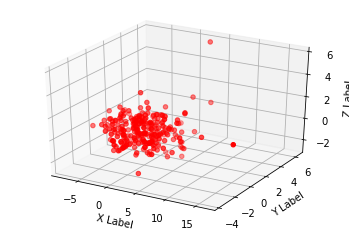

In [86]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')



ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# ***Without using library***

Calculate eigen value and eigen vector

In [103]:
E, E_V = np.linalg.eig(covariance_matrix)


In [104]:
#Eigen values
E

array([1.13457798e+03, 1.76463472e+02, 4.02722751e+01, 1.21902253e+01,
       1.12188007e+01, 6.76962117e+00, 4.42892684e+00, 3.37385159e+00,
       2.37974816e+00, 8.00196049e-06, 2.39301576e-01, 1.90704088e+00,
       1.66487674e+00, 1.44955146e+00, 1.06128668e+00, 6.81138896e-01])

In [105]:
E.shape

(16,)

In [106]:
#Eigen vectors
E_V

array([[-1.54230608e-01, -2.12404805e-01, -7.17658600e-01,
         5.01054643e-01,  1.53473791e-01,  3.16023679e-01,
        -1.42128386e-01,  1.13782665e-01, -2.58434014e-02,
         2.39867358e-03, -2.33451159e-02, -3.33964127e-02,
        -3.45791204e-02,  5.64907212e-02, -4.14022071e-02,
        -5.86901346e-04],
       [ 3.68154332e-04,  5.07866039e-04,  1.79436277e-03,
        -1.20423895e-03, -4.12513902e-04, -7.46763095e-04,
         2.13932410e-04, -1.39736322e-04,  1.35394742e-05,
         9.99996950e-01, -3.85643592e-04, -2.38417344e-05,
        -1.89635725e-04, -1.93238747e-04,  5.89242227e-05,
        -1.30259478e-04],
       [-1.16728268e-02, -9.33465072e-01,  3.15453701e-01,
        -2.03331676e-02,  1.39065811e-01,  5.06060502e-02,
         3.44235309e-02,  4.99975056e-02,  9.04379471e-03,
        -1.56226201e-05,  2.00954437e-02, -2.06361022e-02,
        -9.39223465e-03, -1.85171731e-03,  4.43921951e-02,
        -4.84272133e-03],
       [-8.67071071e-01,  1.22981449e

In [107]:
E_V.shape

(16, 16)

In [108]:
#Selecting first 3 eigen values and veriance = 96.61%
(100*(E[0] / sum(E)))+(100*(E[1] / sum(E)))+(100*(E[2] / sum(E)))


96.61363270409893

In [109]:
eigen1 = E_V.T[0]

In [110]:
eigen2 = E_V.T[1]

In [111]:
eigen3 = E_V.T[2]

In [112]:
x_pca = X.dot(eigen1)

In [113]:
y_pca = X.dot(eigen2)

In [114]:
z_pca = X.dot(eigen3)

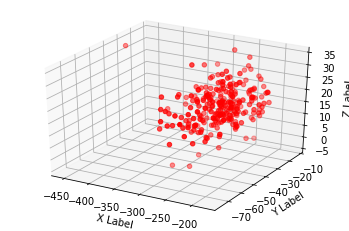

In [122]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection='3d')



ax.scatter(x_pca, y_pca, z_pca, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()